In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #omit info 
from learnMSA.msa_hmm import Configuration, Align, Visualize, Clustering
from learnMSA.msa_hmm.SequenceDataset import SequenceDataset
import numpy as np

2025-01-03 10:30:51.091795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-03 10:30:51.107847: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-03 10:30:51.112705: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1735896652.457766  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896652.493520  717013 cuda_executor.cc:1015] succ

## learnMSA demo

In this notebook, we will fit a number of HMM models to a dataset of unaligned sequences. 
We will then use the fitted models to align the sequences and compare the results.
Moreover, we will visualize the best (according to an objective criterion) model and alignment.

*This notebook is meant to be a demo for running learnMSA in Python code. Check the readme if you want to run learnMSA from the command line.* 

Change the variables in the following cell to fit your needs.

In [1]:
# Your fasta file with unaligned sequences.

train_filename = "test/data/egf.fasta"

# Reference file with aligned sequences that have matching IDs to (potentially a subset of) the 
# sequences in the train_file.
# Replace with empty string if no reference is available.
ref_filename = "test/data/egf.ref"

# The number of independently trained models.
num_models = 2

# Use sequence weights based on a rapid pre-clustering of the sequences (requires mmseqs2 to be installed)
use_weights = True

# Align long insertions with an external aligner left unaligned by the main MSA stage (requires famsa to be installed).
align_insertions = True

## Run learnMSA from Python (Training + Viterbi alignment)

Training of 2 models on file egf.fasta
Configuration: 
{
num_models : 2
transitioner : ProfileHMMTransitioner(
 transition_init=
    {
    begin_to_match : DefaultEntry() , match_to_end : DefaultExit() , 
    match_to_match : DefaultMatchTransition(1) , match_to_insert : DefaultMatchTransition(-1) , 
    insert_to_match : Norm(0, 0.1) , insert_to_insert : Norm(-0.5, 0.1) , 
    match_to_delete : DefaultMatchTransition(-1) , delete_to_match : Norm(0, 0.1) , 
    delete_to_delete : Norm(-0.5, 0.1) , left_flank_loop : Norm(0, 0.1) , 
    left_flank_exit : Norm(-1, 0.1) , right_flank_loop : Norm(0, 0.1) , 
    right_flank_exit : Norm(-1, 0.1) , unannotated_segment_loop : Norm(0, 0.1) , 
    unannotated_segment_exit : Norm(-1, 0.1) , end_to_unannotated_segment : Norm(-9, 0.1) , 
    end_to_right_flank : Norm(0, 0.1) , end_to_terminal : Norm(0, 0.1)
    },
 flank_init=Const(0.0),
 prior=ProfileHMMTransitionPrior(match_comp=1, insert_comp=1, delete_comp=1, alpha_flank=7000, alpha_single=10000

I0000 00:00:1735896657.410571  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896657.410823  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896657.410983  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896657.411190  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/10


I0000 00:00:1735896658.924355  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896658.924609  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896658.924769  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896658.924978  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

34/34 - 13s - 380ms/step - loss: 84.8701 - loglik: -7.9684e+01 - prior: -5.1866e+00 - aux_loss: 0.0000e+00
Epoch 2/10
34/34 - 3s - 77ms/step - loss: 63.4431 - loglik: -6.1550e+01 - prior: -1.8931e+00 - aux_loss: 0.0000e+00
Epoch 3/10
34/34 - 3s - 77ms/step - loss: 62.1909 - loglik: -6.0482e+01 - prior: -1.7091e+00 - aux_loss: 0.0000e+00
Epoch 4/10
34/34 - 3s - 78ms/step - loss: 62.0010 - loglik: -6.0327e+01 - prior: -1.6742e+00 - aux_loss: 0.0000e+00
Epoch 5/10
34/34 - 3s - 77ms/step - loss: 61.8520 - loglik: -6.0198e+01 - prior: -1.6537e+00 - aux_loss: 0.0000e+00
Epoch 6/10
34/34 - 3s - 77ms/step - loss: 61.6517 - loglik: -6.0008e+01 - prior: -1.6442e+00 - aux_loss: 0.0000e+00
Epoch 7/10
34/34 - 3s - 77ms/step - loss: 61.5850 - loglik: -5.9955e+01 - prior: -1.6302e+00 - aux_loss: 0.0000e+00
Epoch 8/10
34/34 - 3s - 76ms/step - loss: 61.5916 - loglik: -5.9970e+01 - prior: -1.6213e+00 - aux_loss: 0.0000e+00
Fitted model successfully.
Creating alignment model...
Successfully created align

I0000 00:00:1735896691.366561  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896691.366811  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896691.366971  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896691.367178  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

expansions model 0: [(12, 2), (13, 3), (14, 1), (17, 1), (18, 2)]
discards model 0: []
expansions model 1: [(12, 2), (13, 3), (18, 1), (19, 2)]
discards model 1: []
Re-initialized the encoder parameters.
Fitting models of lengths [34, 34] on 7774 sequences.
Batch size= 256 Learning rate= 0.1
Using sequence weights  [1.         1.         1.         ... 0.33333334 0.14285715 0.5       ] .
1 sequences are longer than 65 and will be cropped for training.
To disable cropping, use --crop disable. To change the cropping limit to X, use --crop X.
Using 1 GPUs.


I0000 00:00:1735896694.450003  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896694.450278  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896694.450439  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896694.450641  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/10


I0000 00:00:1735896695.471951  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896695.472211  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896695.472369  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896695.472571  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

34/34 - 11s - 329ms/step - loss: 63.4933 - loglik: -5.8499e+01 - prior: -4.9946e+00 - aux_loss: 0.0000e+00
Epoch 2/10
34/34 - 3s - 77ms/step - loss: 58.7561 - loglik: -5.6998e+01 - prior: -1.7582e+00 - aux_loss: 0.0000e+00
Epoch 3/10
34/34 - 3s - 78ms/step - loss: 58.5367 - loglik: -5.7017e+01 - prior: -1.5197e+00 - aux_loss: 0.0000e+00
Epoch 4/10
34/34 - 3s - 75ms/step - loss: 58.3516 - loglik: -5.6873e+01 - prior: -1.4788e+00 - aux_loss: 0.0000e+00
Epoch 5/10
34/34 - 3s - 75ms/step - loss: 58.2625 - loglik: -5.6831e+01 - prior: -1.4311e+00 - aux_loss: 0.0000e+00
Epoch 6/10
34/34 - 3s - 78ms/step - loss: 58.2601 - loglik: -5.6864e+01 - prior: -1.3965e+00 - aux_loss: 0.0000e+00
Epoch 7/10
34/34 - 3s - 77ms/step - loss: 58.2112 - loglik: -5.6837e+01 - prior: -1.3737e+00 - aux_loss: 0.0000e+00
Epoch 8/10
34/34 - 3s - 76ms/step - loss: 58.1159 - loglik: -5.6773e+01 - prior: -1.3432e+00 - aux_loss: 0.0000e+00
Epoch 9/10
34/34 - 3s - 78ms/step - loss: 58.1623 - loglik: -5.6836e+01 - prior: 

I0000 00:00:1735896730.197879  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896730.198145  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896730.198306  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896730.198508  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Aligning 2 insertion slices with famsa.
time for generating output: 2.9638
Wrote file test/data/interactive.alignment.fasta
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step
>l=-55.00_t=0.01
..........$CD.......P.....N............P.........CYN.H.G..T..C-...S......................L..R......-AT................G..........YTCSC..-..LPR......Y....T....GEH$.......................
>l=-53.99_t=0.01
..........$CD.......S.....Q............P.........CRN.G.-..T..CS...L......................N..T......-NT................D..........YTCAC..-..FPG......Y....T....GRY$.......................
>l=-46.80_t=0.00
..........$CD.......S.....D............P.........CLN.G.G..T..C-...T......................L..R......SLD................S..........YSCAC..-..APG......Y....T....GQH$.......................
>l=-62.40_t=0.00
..........$CD.......H.....V............T.........CLN.G.G..T..C-...Q......................L..K......TLE................D..........YTCAC..-..ANG......Y....T....GER$.......................
>l=-63.26_t=0.01
.......

/home/felix/miniforge3/envs/learnMSAdev/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['sequences', 'indices']. Received: the structure of inputs=('*', '*')
  warnings.warn(
I0000 00:00:1735896736.330332  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896736.330566  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735896736.330725  717013 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but the

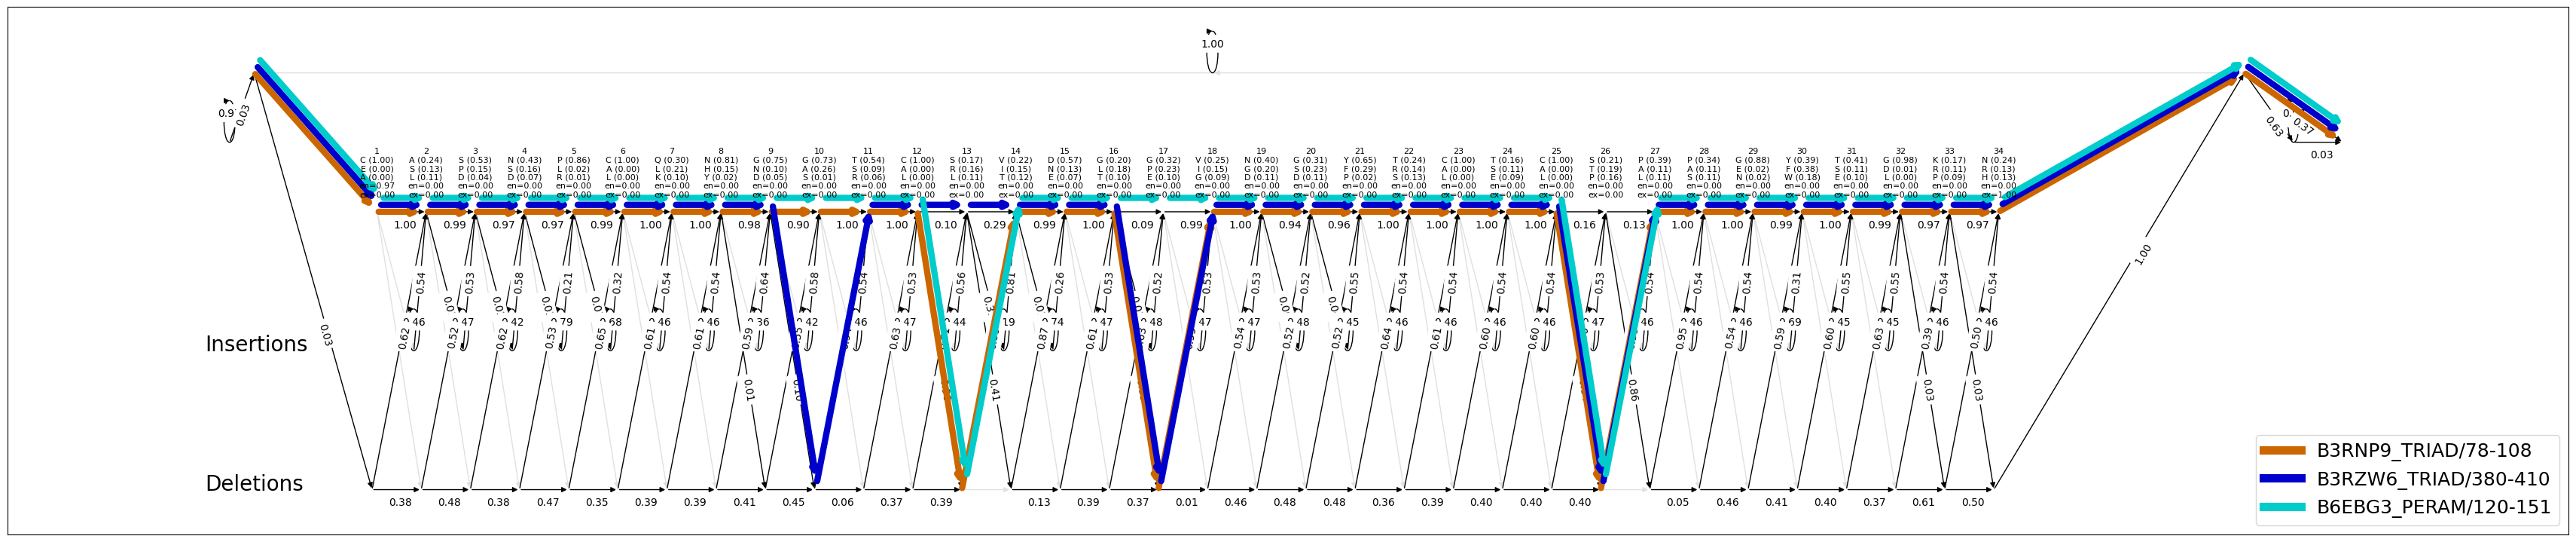

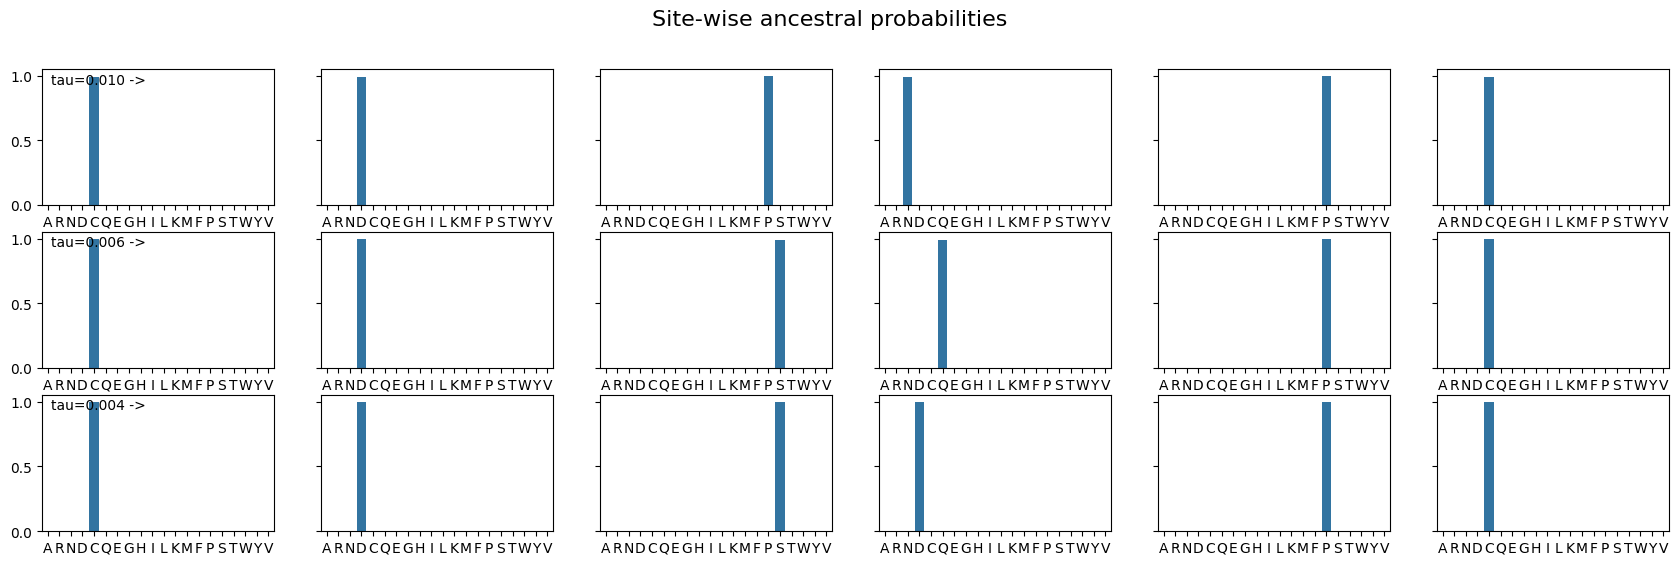

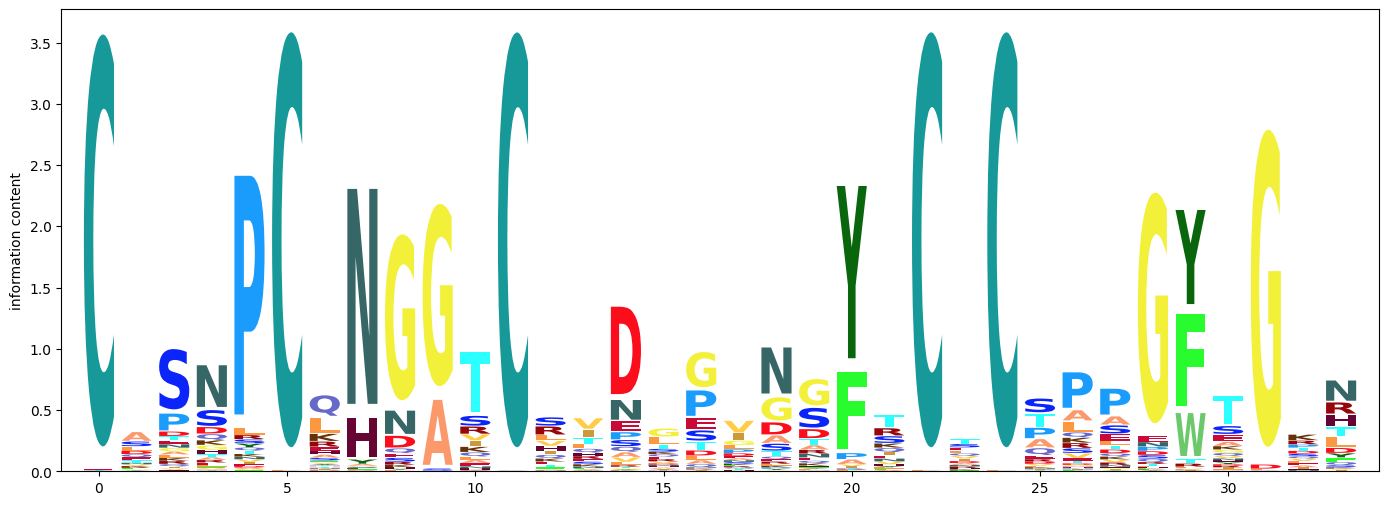

In [3]:
out_filename = "test/data/interactive.alignment.fasta"
config = Configuration.make_default(num_models)
with SequenceDataset(train_filename, fmt="fasta") as data:
    config["crop_long_seqs"] = int(np.ceil(2 * np.mean(data.seq_lens))) #comment out to disable cropping
    alignment_model = Align.run_learnMSA(data,
                                        out_filename,
                                        config, 
                                        sequence_weights=Clustering.compute_sequence_weights(train_filename, "tmp", config["cluster_seq_id"]) 
                                            if use_weights else None,
                                        verbose=True,
                                        align_insertions=align_insertions)
    Visualize.print_and_plot(alignment_model, alignment_model.best_model)

In [2]:
!id_list=$(sed -n '/^>/p' {ref_filename} | sed 's/^.//') ; export MAX_N_PID_4_TCOFFEE=10000000 ; t_coffee -other_pg seq_reformat -in test/data/interactive.alignment.fasta -action +extract_seq_list ${{id_list[@]}} +rm_gap > test/data/interactive.projection.fasta

HERE: 1ixa
HERE: 1apo
HERE: 1urk
HERE: 1fsb
HERE: 1esl
HERE: 1hre
HERE: 1epi
HERE: 4tgf
HERE: 1hcgb
HERE: 1dan1
HERE: 1dan2
HERE: 1rfnb


In [3]:
!t_coffee -other_pg aln_compare -al1 {ref_filename} -al2 test/data/interactive.projection.fasta -compare_mode sp

*****************************************************
seq1       seq2          Sim   [ALL]           Tot  
egf           12         31.1    73.4 [100.0]   [ 5182]
